# Black Friday Sales Prediction

# Objective:Prediction of how much a person would spend on which cateogaries

This dataset is used to identify which person spends on which cateogary and how much is spent.Also identify which items are bought up most during Black Friday Sales so that company stores that goods in large amount.The dataset is fetched from Kaggle

# Variable Defination


In [71]:
#User_ID  	User ID
#Product_ID	Product ID
#Gender	    Sex of User
#Age	        Age divided in various groups
#Occupation	 Occupation (Masked)
#City_Category	Category of the City (A,B,C)
#Stay_In_Current_City_Years	Number of years stay in current city
#Marital_Status	   Marital Status
#Product_Category_1	  Product Category (Masked)
#Product_Category_2	 Product may belongs to other category also (Masked)
#Product_Category_3	 Product may belongs to other category also (Masked)
#Purchase Amount   (Target Variable)

# Importing Libraries and Loading data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("black friday sales report.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.shape

(550068, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Checking for Null Values


In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Null Value in percentage


In [7]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [8]:
#There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

# Unique elements in each attributes


In [9]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [10]:
#We can drop User_ID and Product_ID for model prediction as it has more unique values.

# EDA


# Target Variable Purchase

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


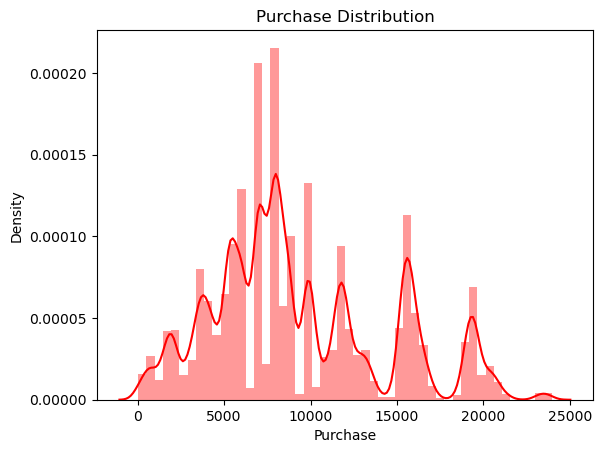

In [11]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


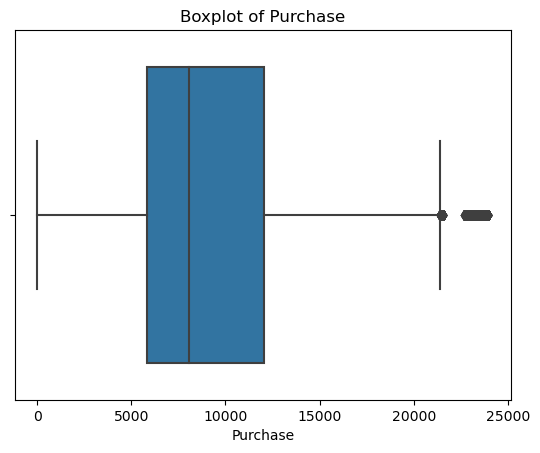

In [12]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [13]:
data["Purchase"].skew()

0.6001400037087128

In [14]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [15]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [16]:
#The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

# Gender


C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


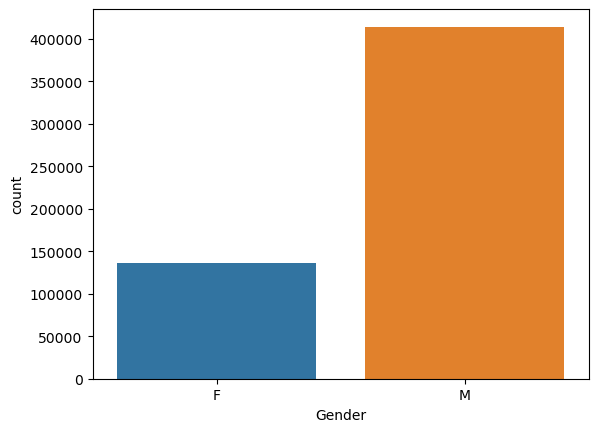

In [17]:
sns.countplot(data['Gender'])
plt.show()

In [18]:
data['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [19]:
#There are more males than females

In [20]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [21]:
#On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

# Marital Status

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


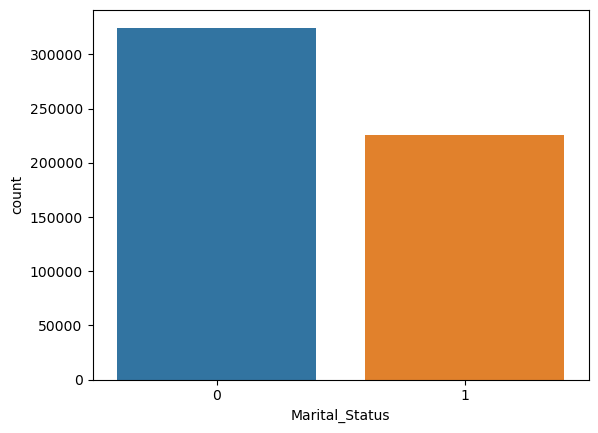

In [22]:
sns.countplot(data['Marital_Status'])
plt.show()

In [23]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

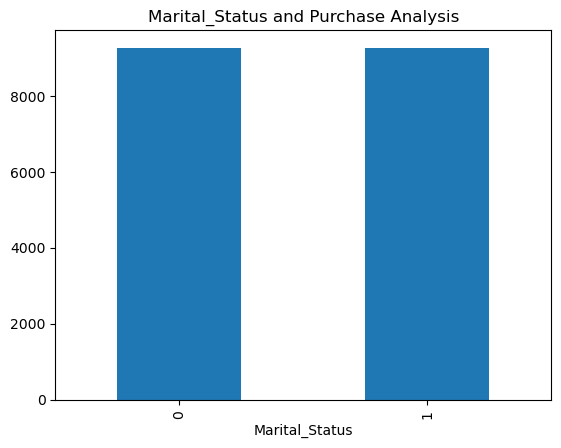

In [24]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

In [25]:
#This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

# Occupation

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


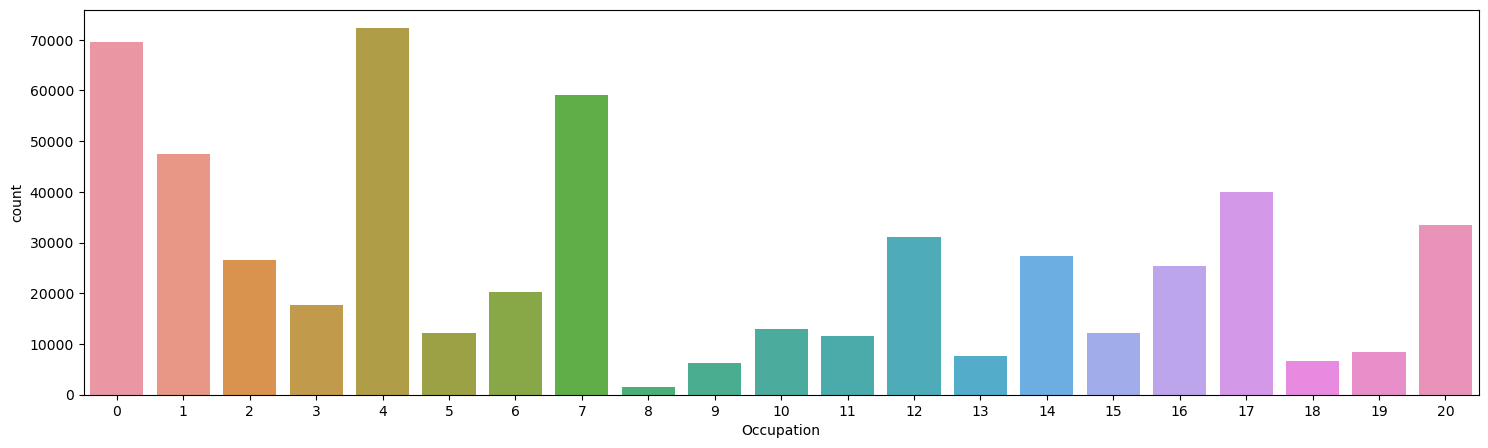

In [26]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

In [27]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


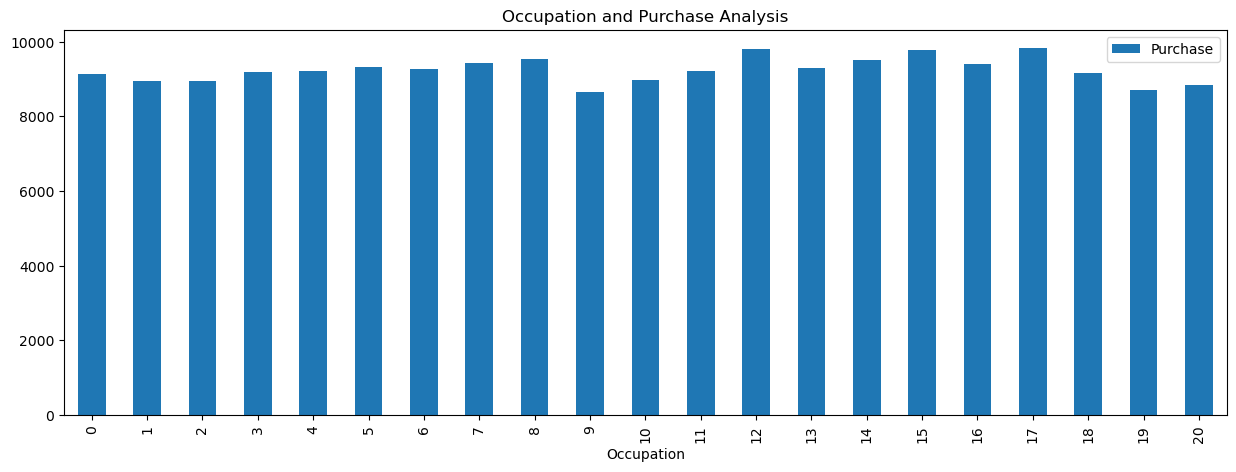

In [28]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

In [29]:
#Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

# City Category


C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


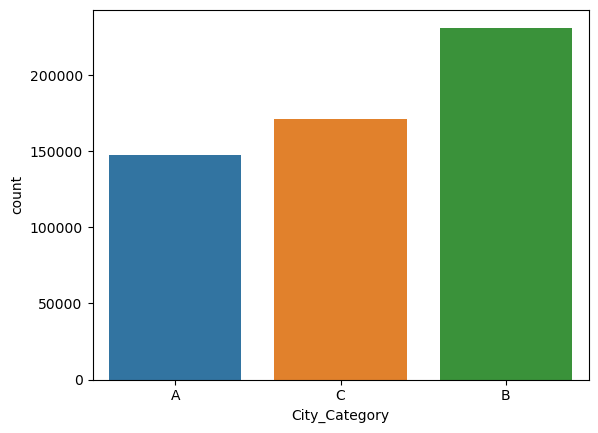

In [30]:
sns.countplot(data['City_Category'])
plt.show()

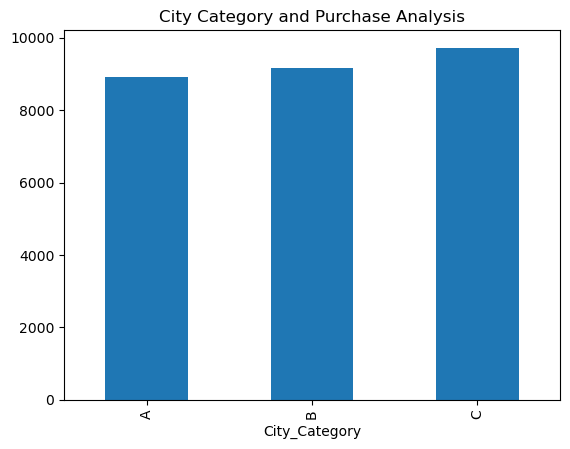

In [31]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

In [32]:
#However, the city whose buyers spend the most is city type ‘C’.

# Stay In Current City Years

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


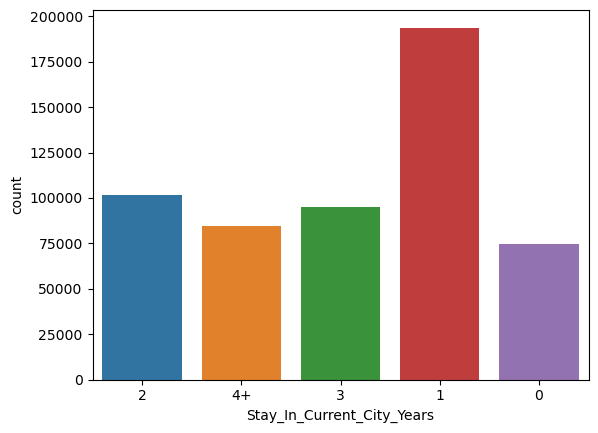

In [33]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

In [34]:
#It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

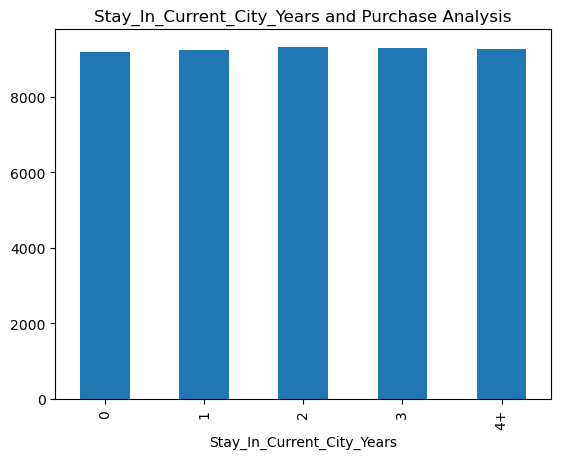

In [35]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

# Age

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


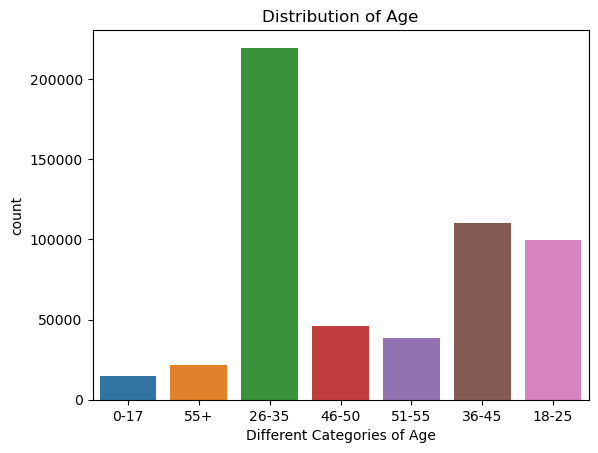

In [36]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

<AxesSubplot:xlabel='Age'>

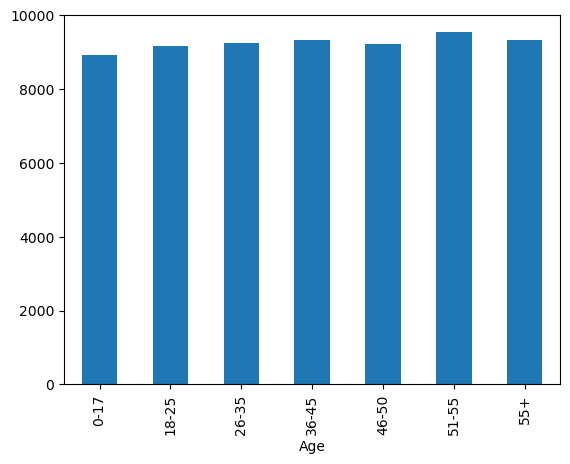

In [37]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')

In [38]:
#Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

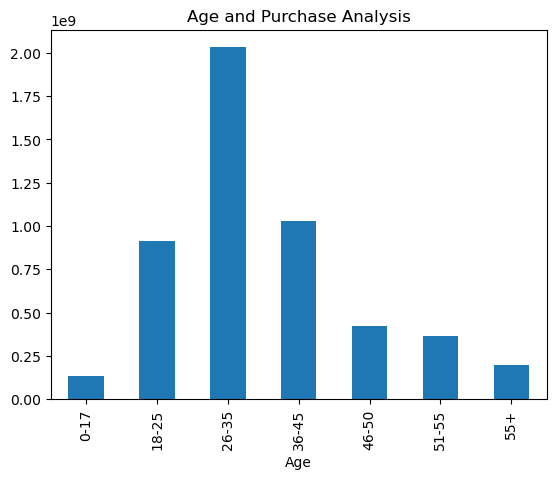

In [39]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

In [40]:
#Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

# Product Category 1


C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


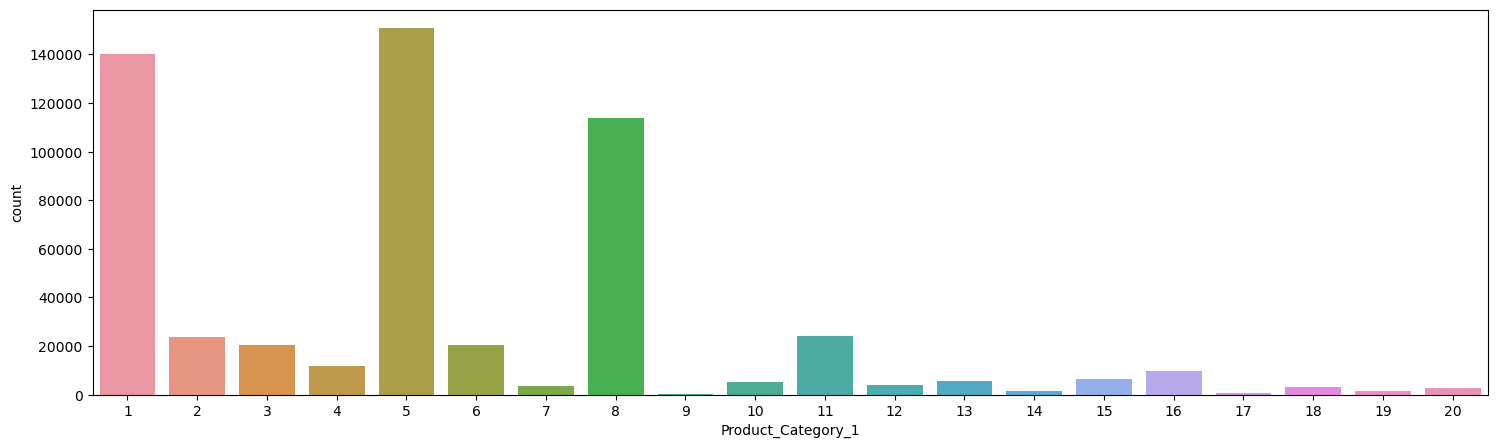

In [41]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

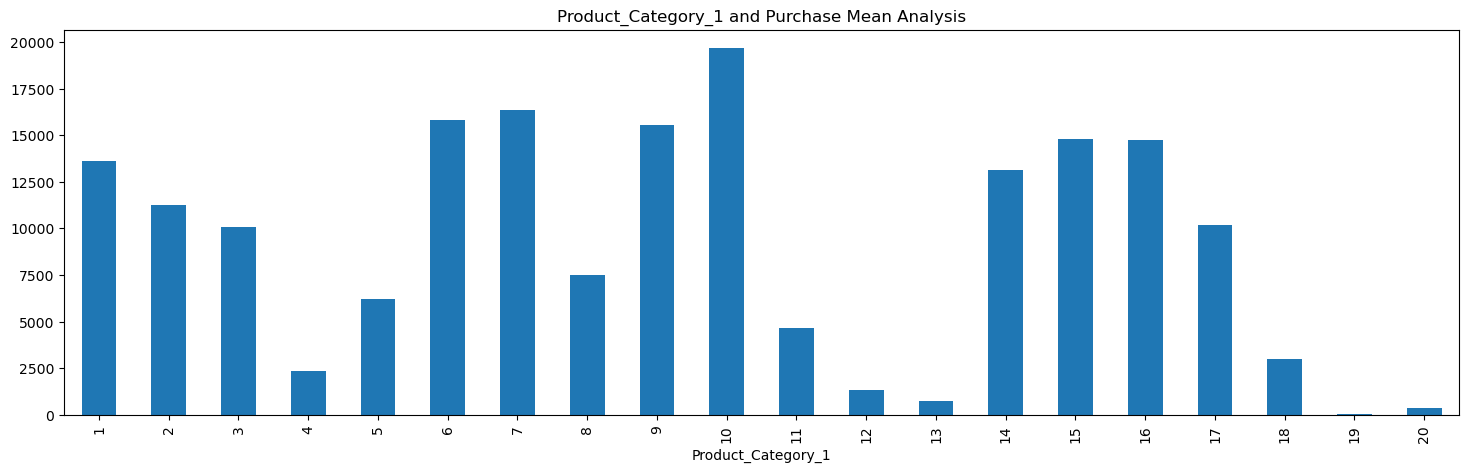

In [42]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

In [43]:
#If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

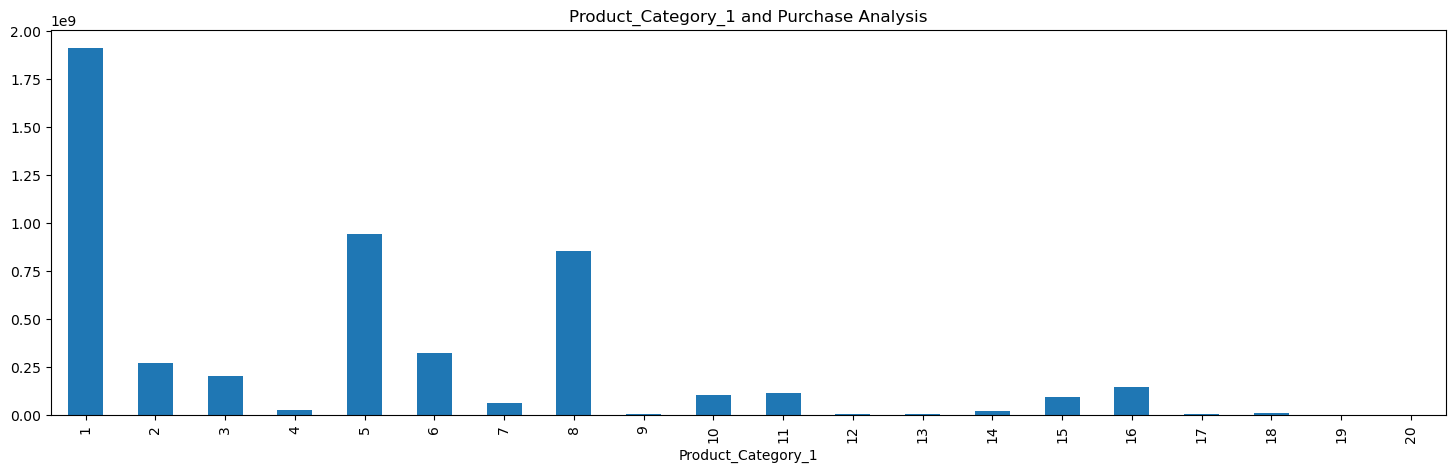

In [44]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

# Product Category 2 

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


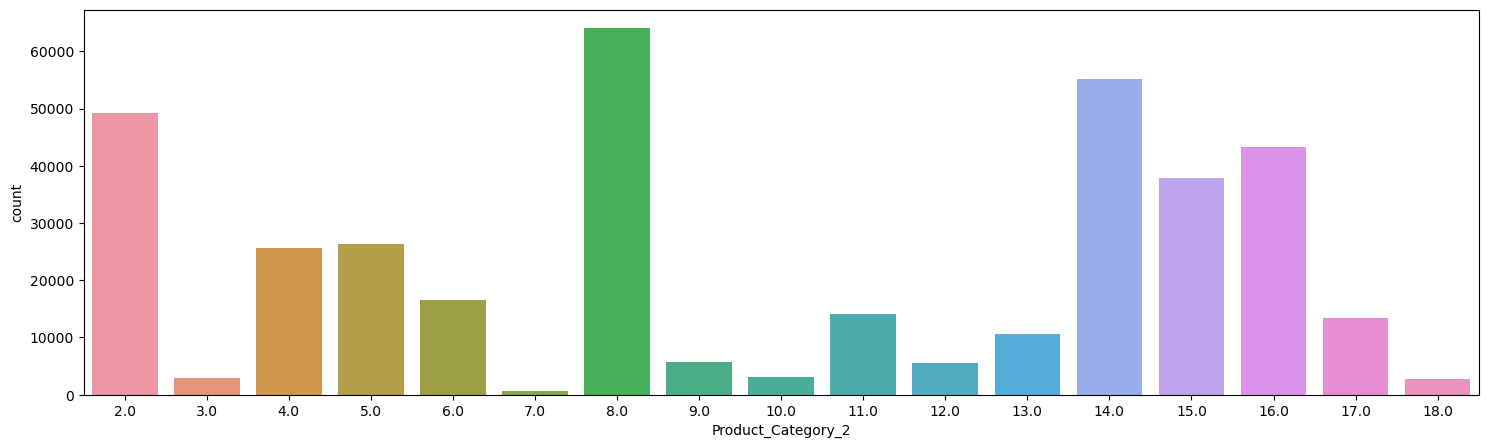

In [45]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

# Product Category 3

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


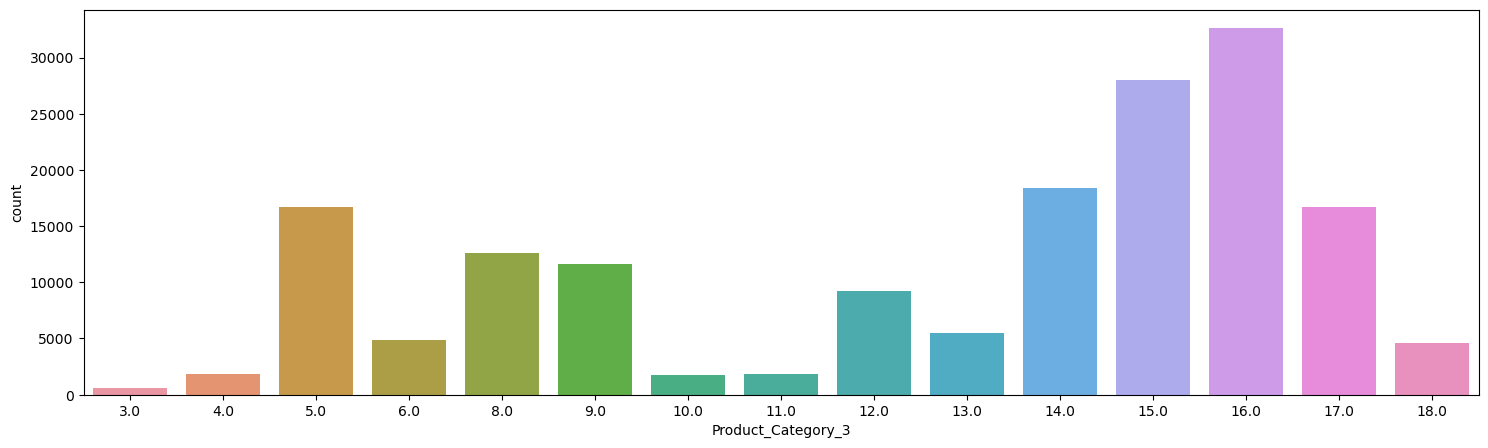

In [46]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [47]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


# Heatmap

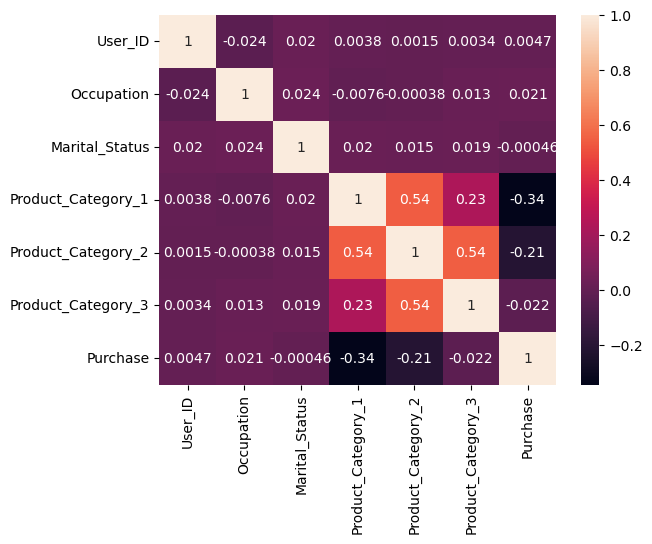

In [48]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [49]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [50]:
df = data.copy()

In [51]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Encoding the categorical variables

In [52]:
cols=['Gender','Age','City_Category','Stay_In_Current_City_Years']

from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
for col in cols:
    df[col]=lr.fit_transform(df[col])

In [53]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [54]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [55]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int32 
 6   Stay_In_Current_City_Years  550068 non-null  int32 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int32(4), int64(7), object(1)
memory usage: 42.0+ MB


# Dropping the irrelevant columns

In [57]:
df = df.drop(["User_ID","Product_ID"],axis=1)

# Splitting data into independent and dependent variables

In [58]:
X = df.drop("Purchase",axis=1)

In [59]:
y=df['Purchase']

In [60]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,0,0
1,0,0,10,0,2,0,1,6,14
2,0,0,10,0,2,0,12,0,0
3,0,0,10,0,2,0,12,14,0
4,1,6,16,2,4,0,8,0,0


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Modeling

# Linear Regression


In [62]:
from sklearn.linear_model import LinearRegression

lregressor=LinearRegression()
lregressor.fit(X_train,y_train)

print("Intercept",lregressor.intercept_)
print("\nSlope:",lregressor.coef_)

y_pred=lregressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Intercept 9533.6698369969

Slope: [ 465.5149022   112.4429398     5.04955382  314.52019346    2.29459121
  -58.02038838 -348.46256921   12.98331245  143.49213646]
Mean Absolute Error: 3532.0816508760017
Mean Squared Error: 21398226.092867162
Root Mean Squared Error: 4625.821666781715


# DecisionTree

In [63]:
from sklearn.tree import DecisionTreeRegressor
 
dregressor = DecisionTreeRegressor()
dregressor.fit(X_train , y_train)
y_pred=dregressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 2368.8496634128637
Mean Squared Error: 11267073.211627757
Root Mean Squared Error: 3356.6461254692545


# Random Forest


In [64]:
from sklearn.ensemble import RandomForestRegressor

rreg=RandomForestRegressor(n_estimators=66, random_state=0)
rreg.fit(X_train, y_train)
y_pred=rreg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 2225.133954469935
Mean Squared Error: 9342735.853681996
Root Mean Squared Error: 3056.5889245500443


# Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

reg=GradientBoostingRegressor(n_estimators=66, random_state=0)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 2297.147677496815
Mean Squared Error: 9050429.417687317
Root Mean Squared Error: 3008.393162086252


# XGBoost Regressor

In [66]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree= 0.3,learning_rate=0.2,
                          max_depth=10,aplha=15,n_estimators=100)

xg_reg.fit(X_train,y_train)

y_pred=xg_reg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


[13:17:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "aplha" } are not used.

Mean Absolute Error: 2218.415243427487
Mean Squared Error: 8685790.169104405
Root Mean Squared Error: 2947.166464437393


# Report Of Dataset

In [67]:
from pandas_profiling import ProfileReport

C:\Users\nony1\AppData\Local\Temp\ipykernel_21436\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [68]:
rp =ProfileReport(df)
rp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
#The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2875

# Prediction 

In [70]:
Gender=int(input("enter gender "))
Age=int(input("enter age "))
Occupation=int(input("enter occupation"))
City_Category=int(input("enter city cateogary"))
Stay_In_Current_City_Years=int(input("enter number of years from when person is living"))
Marital_Status=int(input("enter person maritial status "))
Product_Category_1=int(input("enter cateogary"))
Product_Category_2=int(input("enter cateogary"))
Product_Category_3=int(input("enter cateogary"))

y_pred=lregressor.predict([[Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3]])
print(y_pred)


enter gender 0
enter age 1
enter occupation5
enter city cateogary2
enter number of years from when person is living1
enter person maritial status 0
enter cateogary4
enter cateogary5
enter cateogary9
[10265.19103756]


C:\Users\nony1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
